## Pair plots

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Introduction of Dataset

> The dataset for this task is Wine dataset, in which they are 6497 samples and 13 dimensions. In the 13 dimensions, 2 dimensions are labels. One, is quality feature and second is color. They are seven types of quality of wine and two kinds of colors. Here is split the dataset as Wine-Quality dataframe and Wine- Color dataframe and perform the normalisation of both the data frames, to compare the pair plots with and without normalization.

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [3]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [4]:
wine[DL].describe()
wine[DL].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

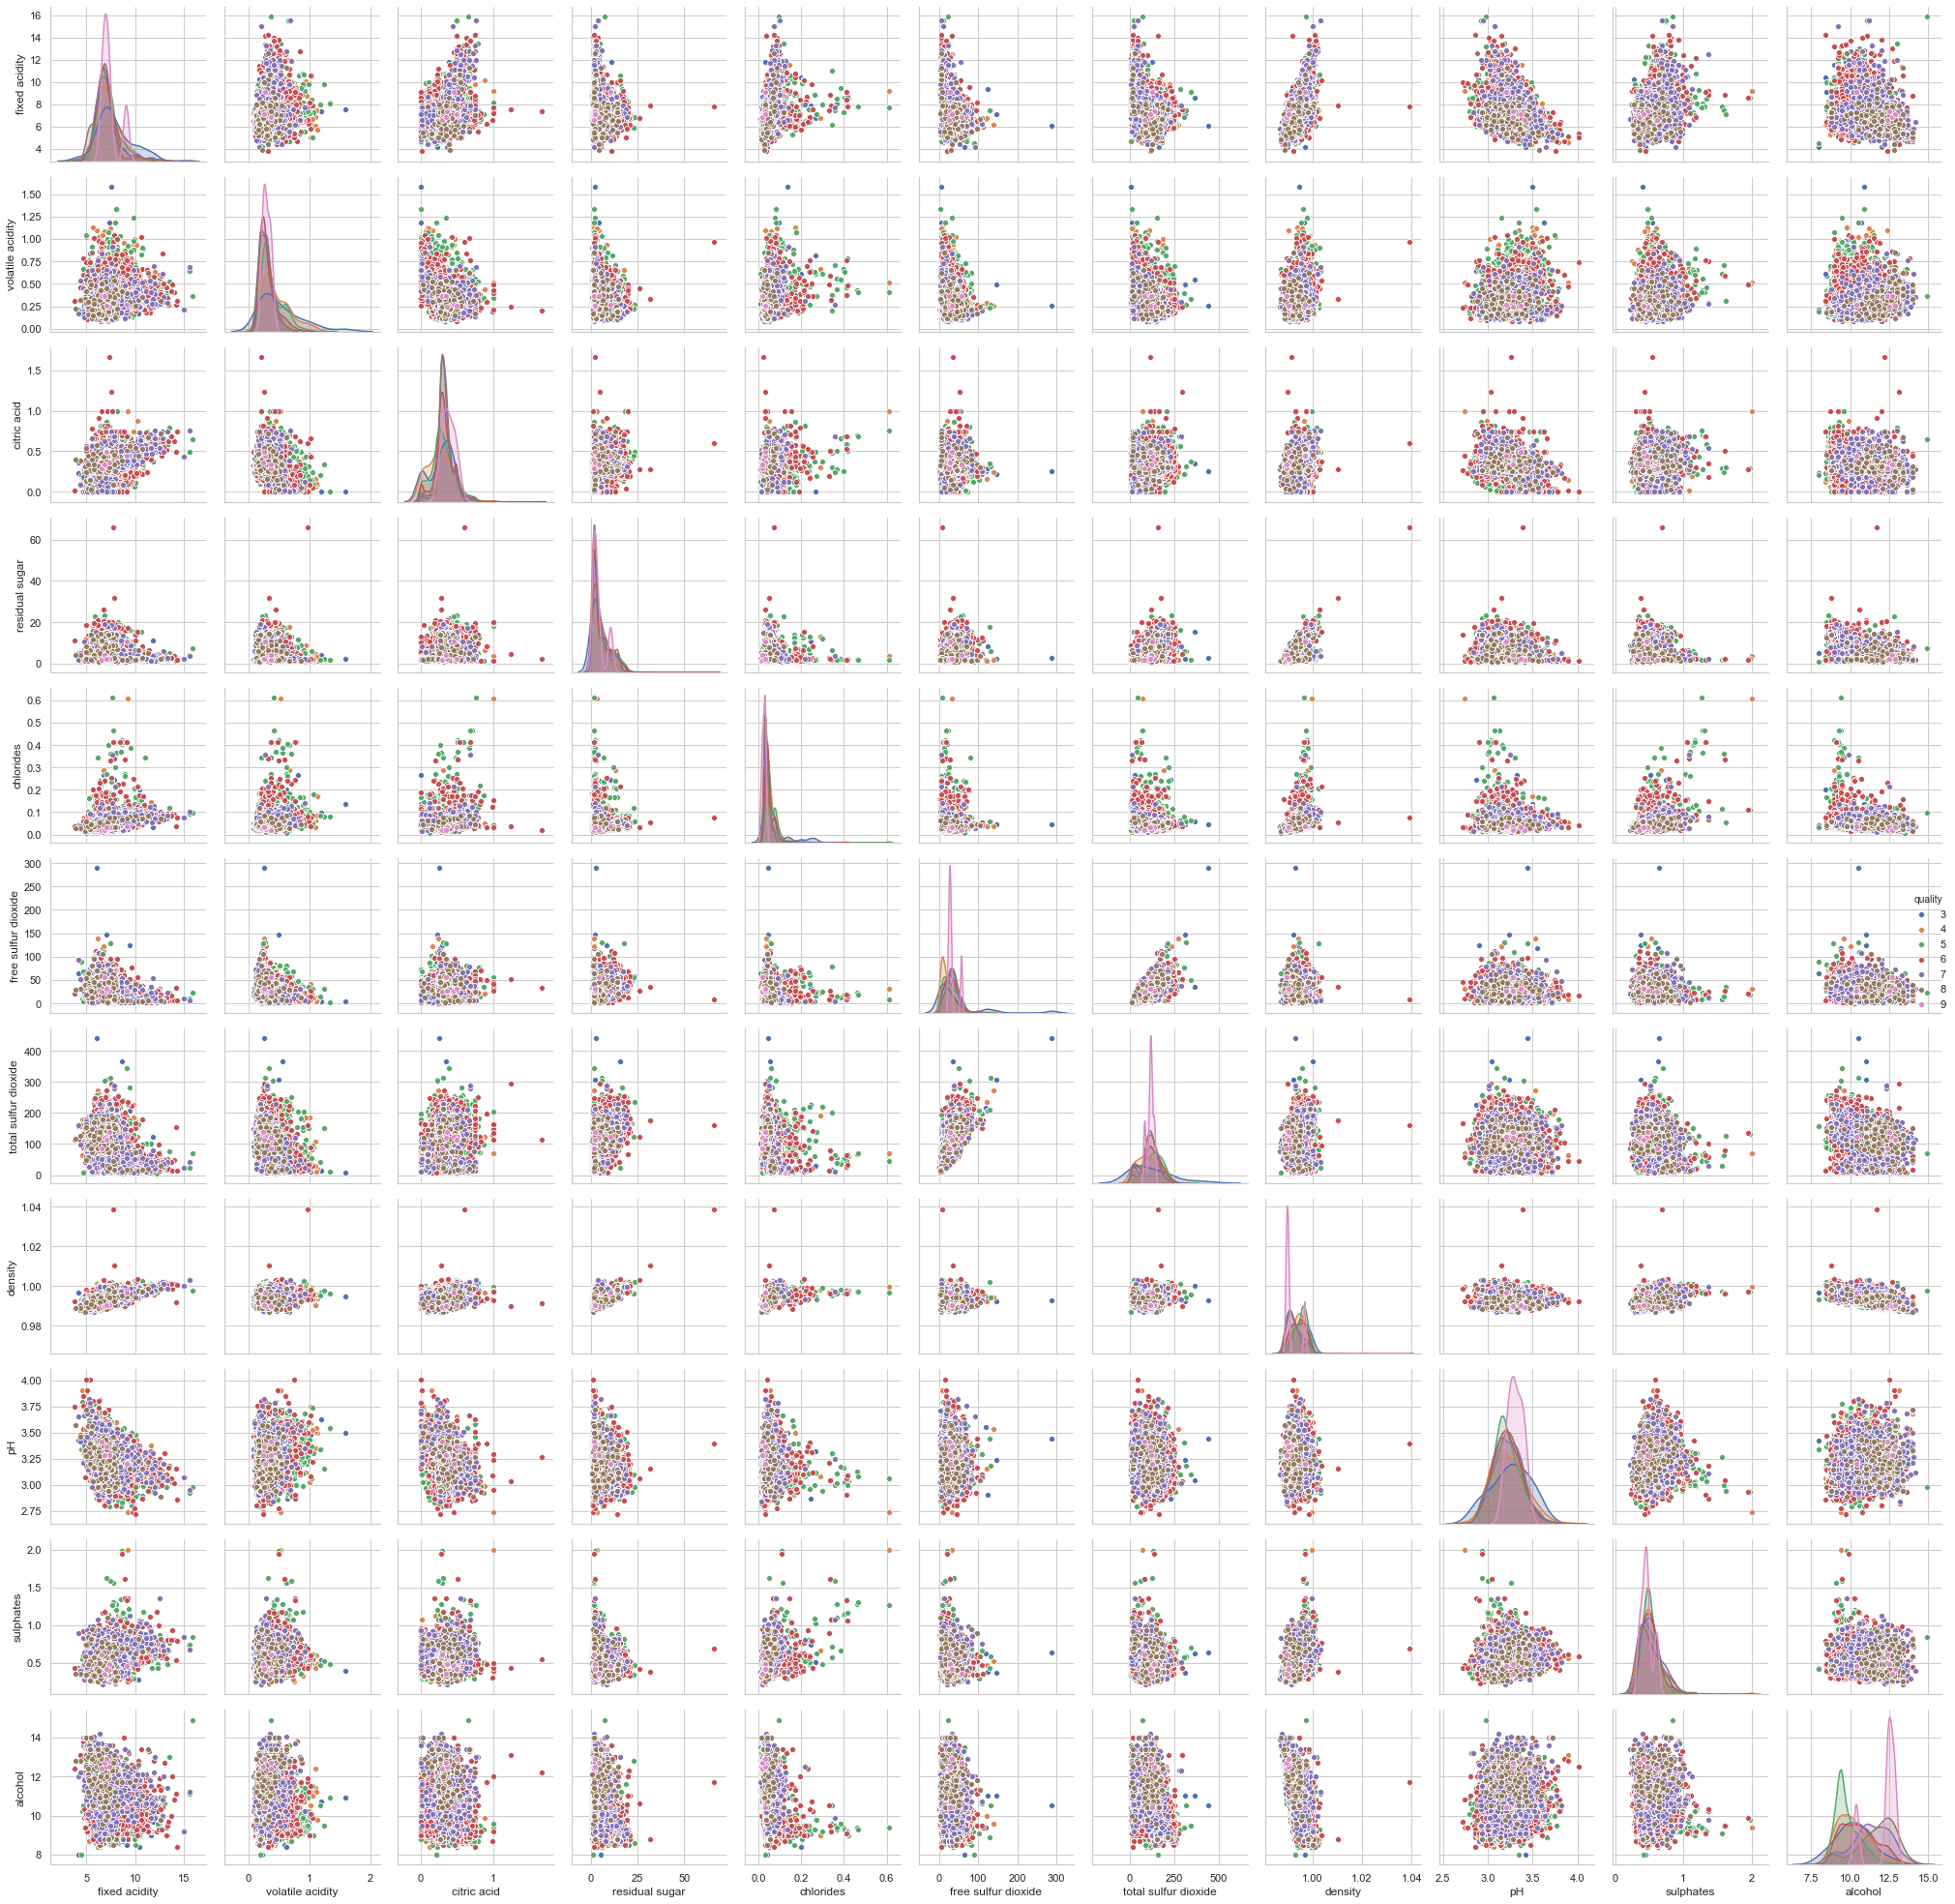

In [5]:
var=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

sns.set(style='whitegrid', context='notebook')

sns.pairplot(wine[DL], hue="quality",diag_kind = 'kde',vars=var)
plt.tight_layout()

plt.show()

In [6]:
# Z-score Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wine_Z = sc.fit_transform(wine[DL])


In [7]:
conc = np.vstack(wine_Z)
newdf = pd.DataFrame(conc,columns=DL)

In [8]:
var=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


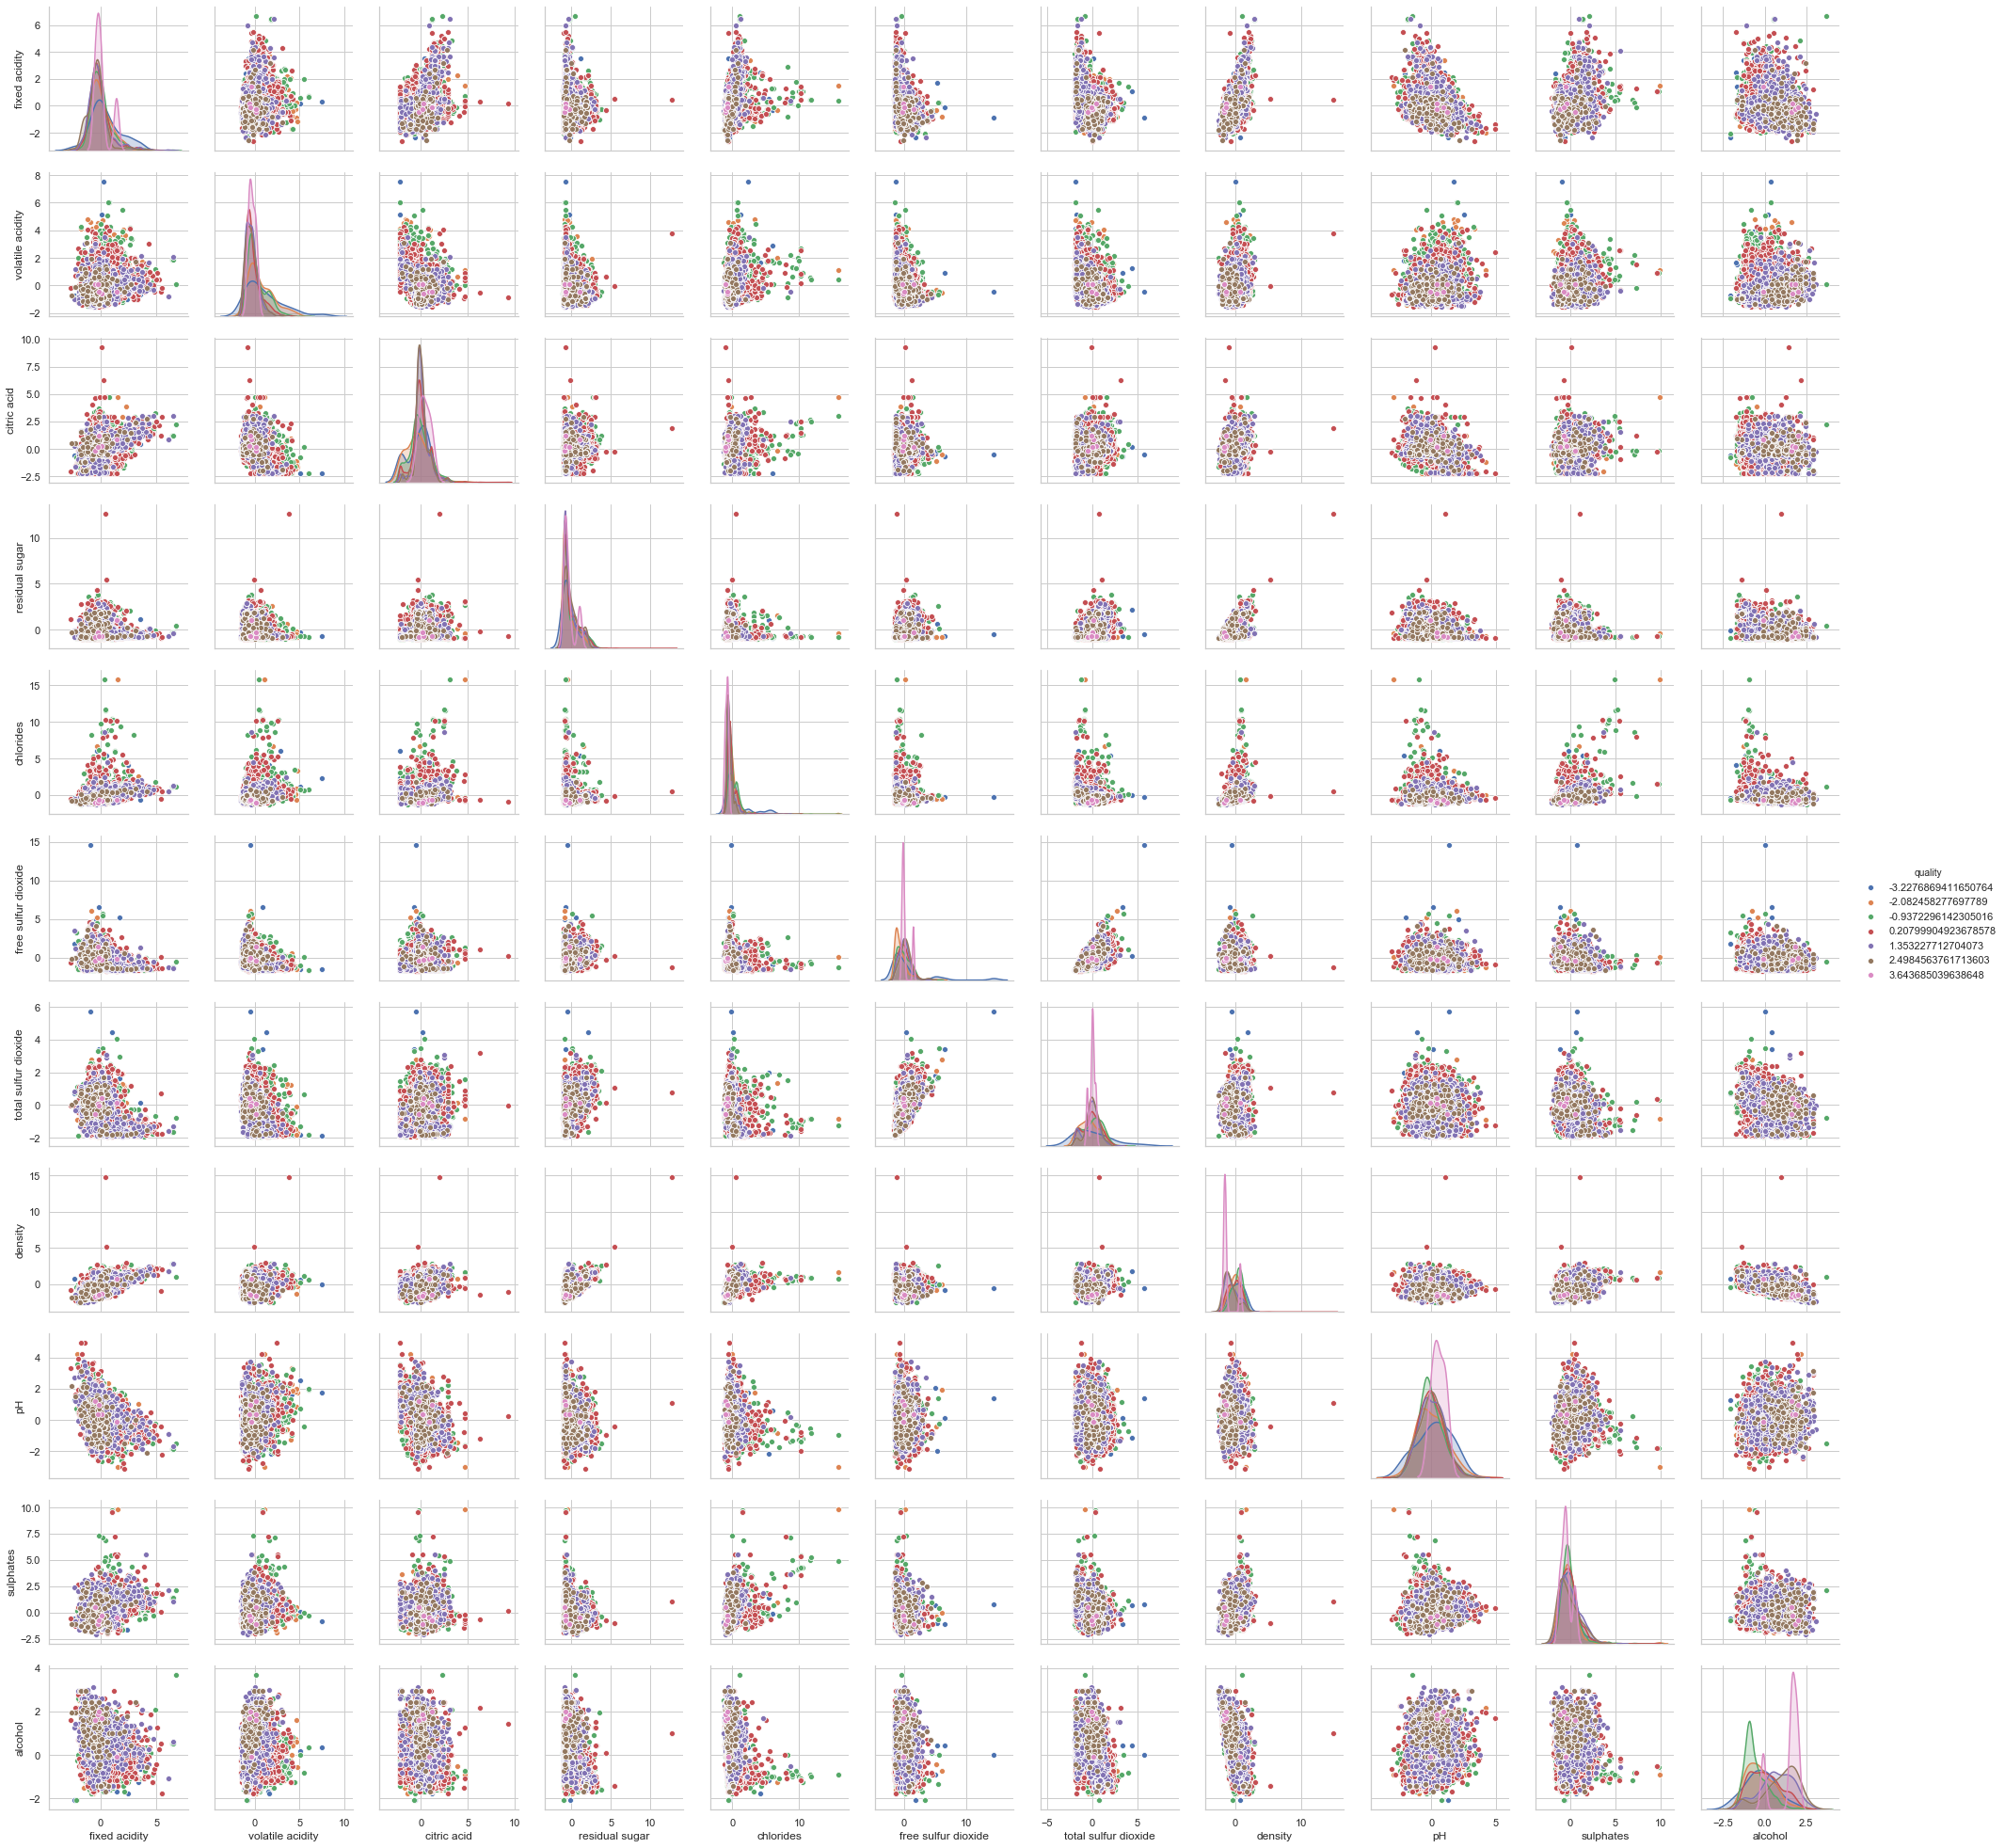

In [9]:
sns.pairplot(newdf ,hue='quality',diag_kind = 'kde',vars=var)

>The above two pair plots of Quality of Wine dataset. The first pair plot is the represents the unnormalised data and we can observe that the plots are not scaled. Although there is no change in data points of the graphs in both the pair plots, The normalized pair plots is more scaled which will help us understand the data in more explicitly. For example, we consisder a pair plot like Citric Acid [Y-axis] vs Fixed Acidity plot[X-axis]. In the Unnormalized plot the scale is ranged from [4,16] in y-axis and in x-axis [5,15] where as the Normalised plot is scaled in the range of [-2,6] in y-axis and in x-axis scaled range is [0,5].Therefore we can observe that the normalization of the data gives us the numerical stability i.e. we can observe balance in the scale.

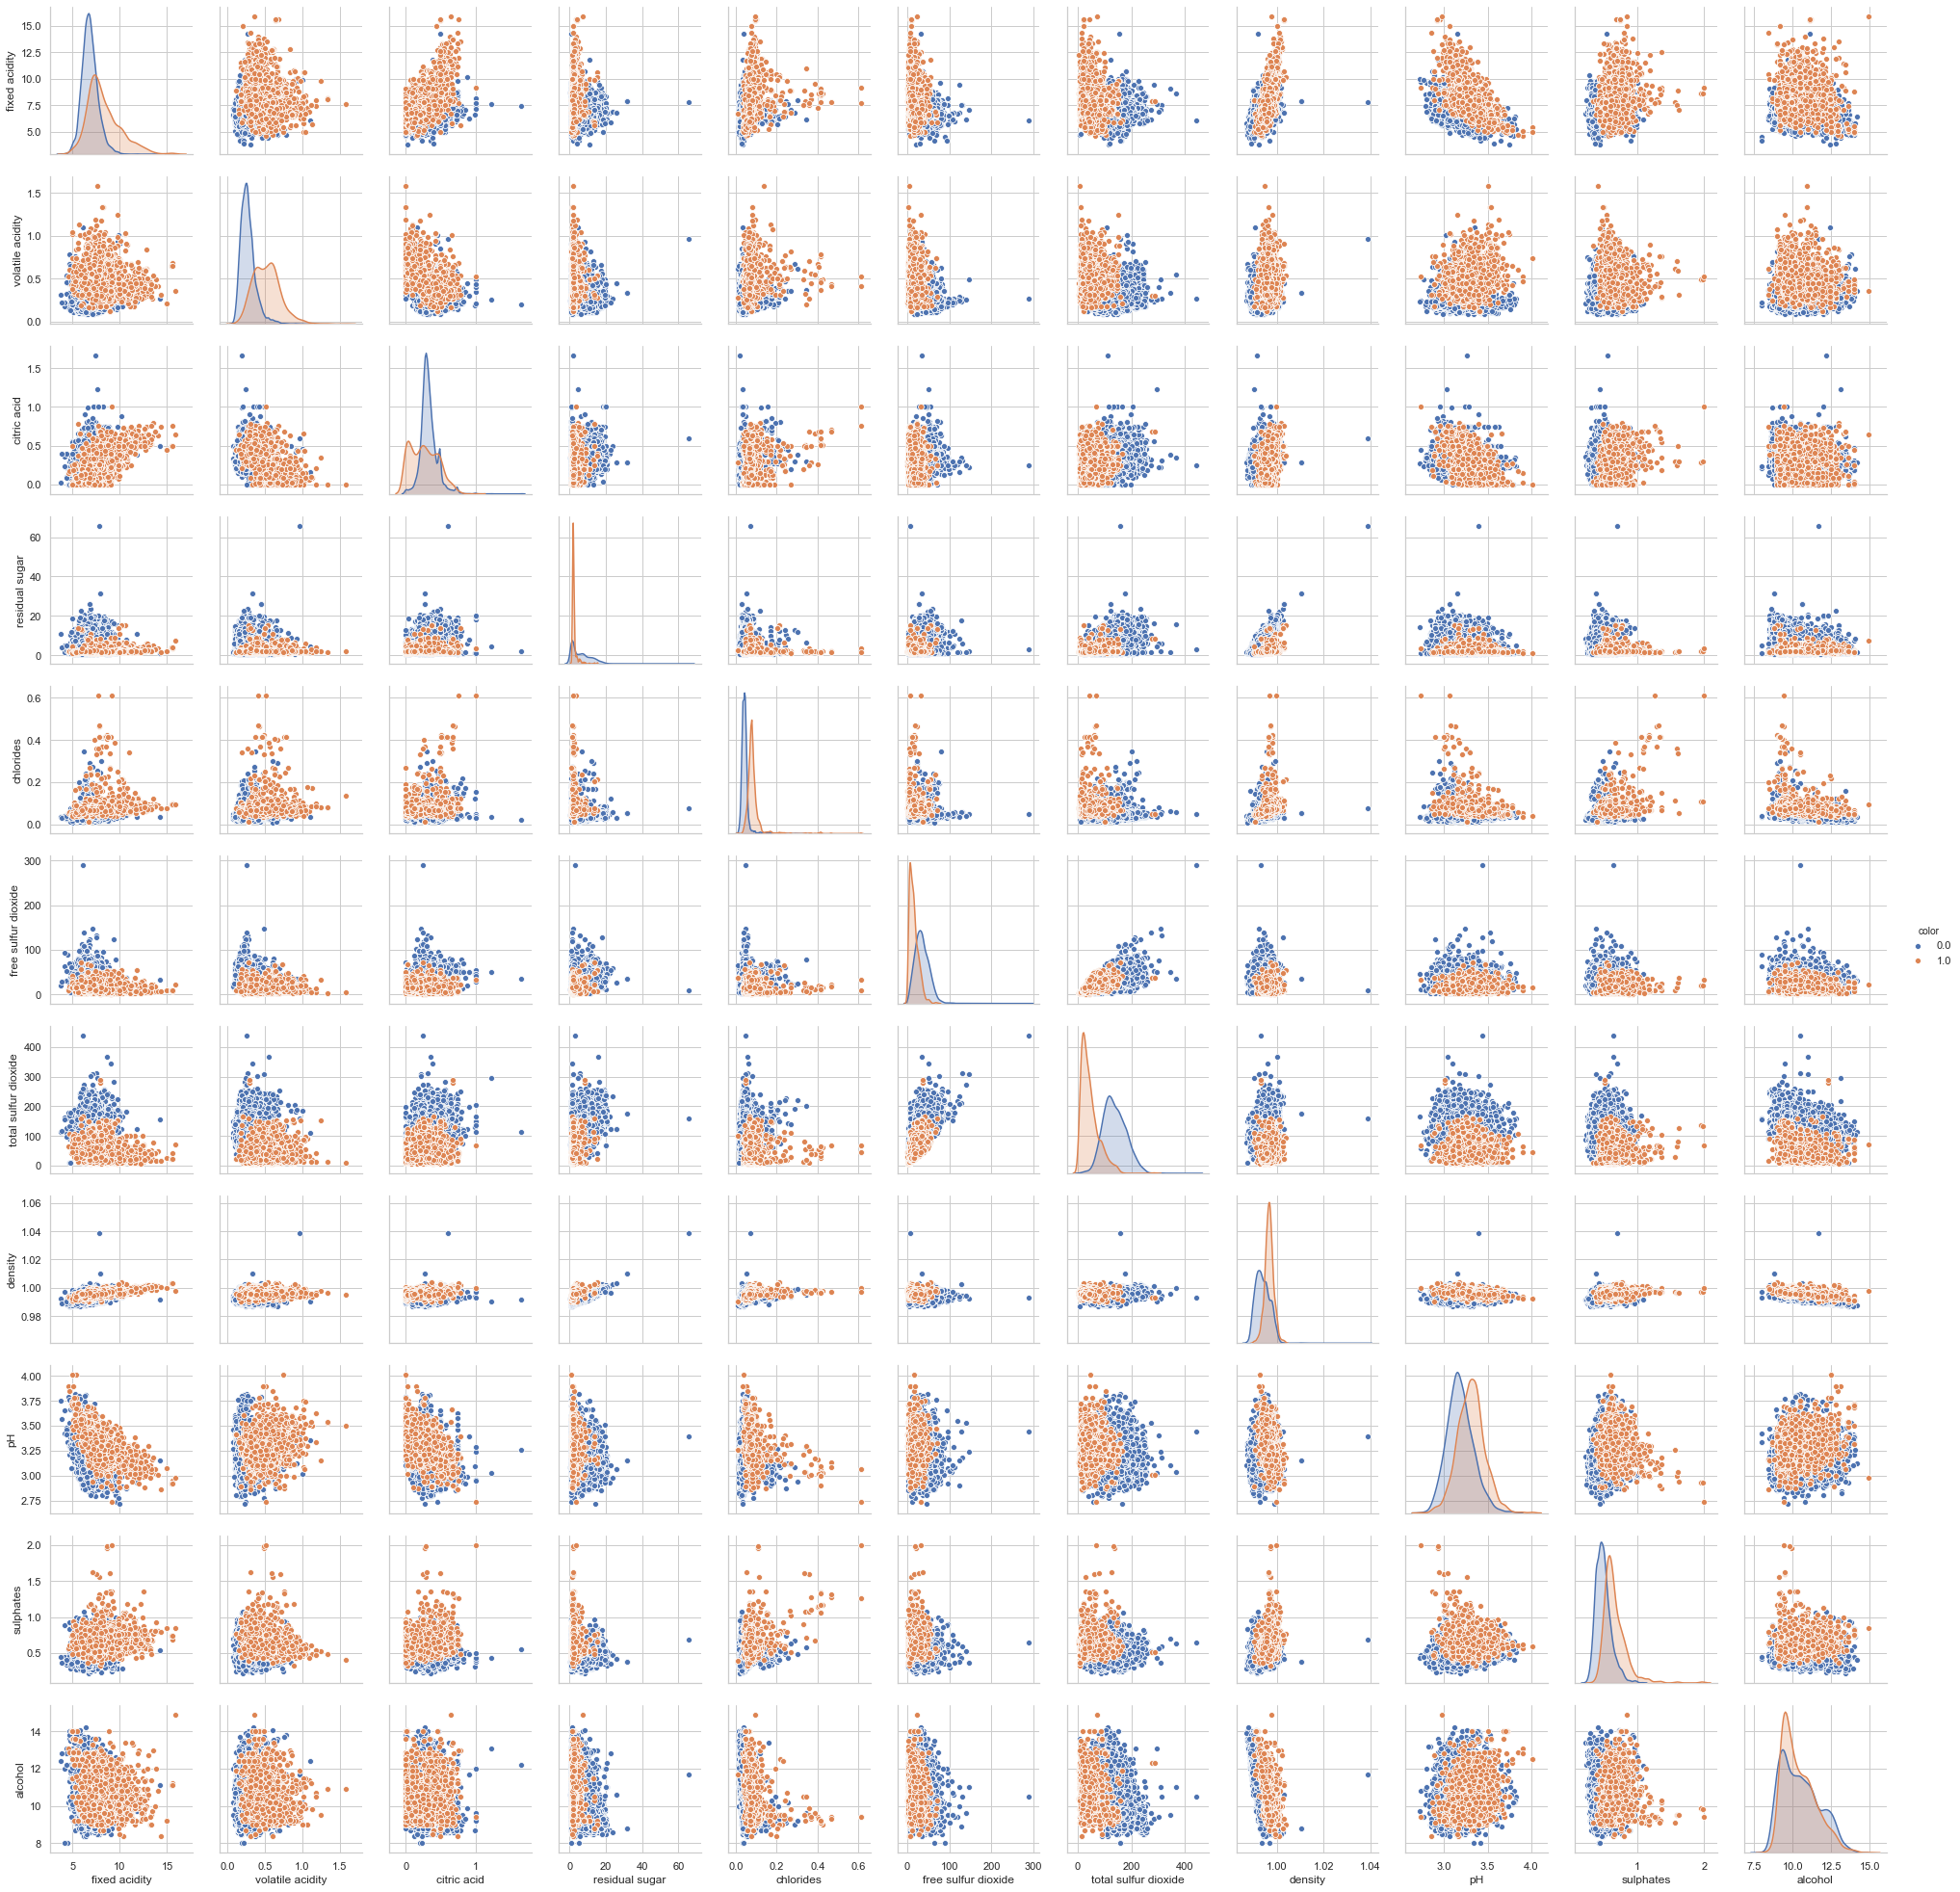

In [10]:
sns.pairplot(wine[DC],hue='color',diag_kind = 'kde',vars=var)

In [11]:
# Z-score Normalization
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
wine_Zc = sc1.fit_transform(wine[DC])
#print(wine_Zc)

In [12]:
conc1 = np.vstack(wine_Zc)
newdf_C = pd.DataFrame(conc1,columns=DC)


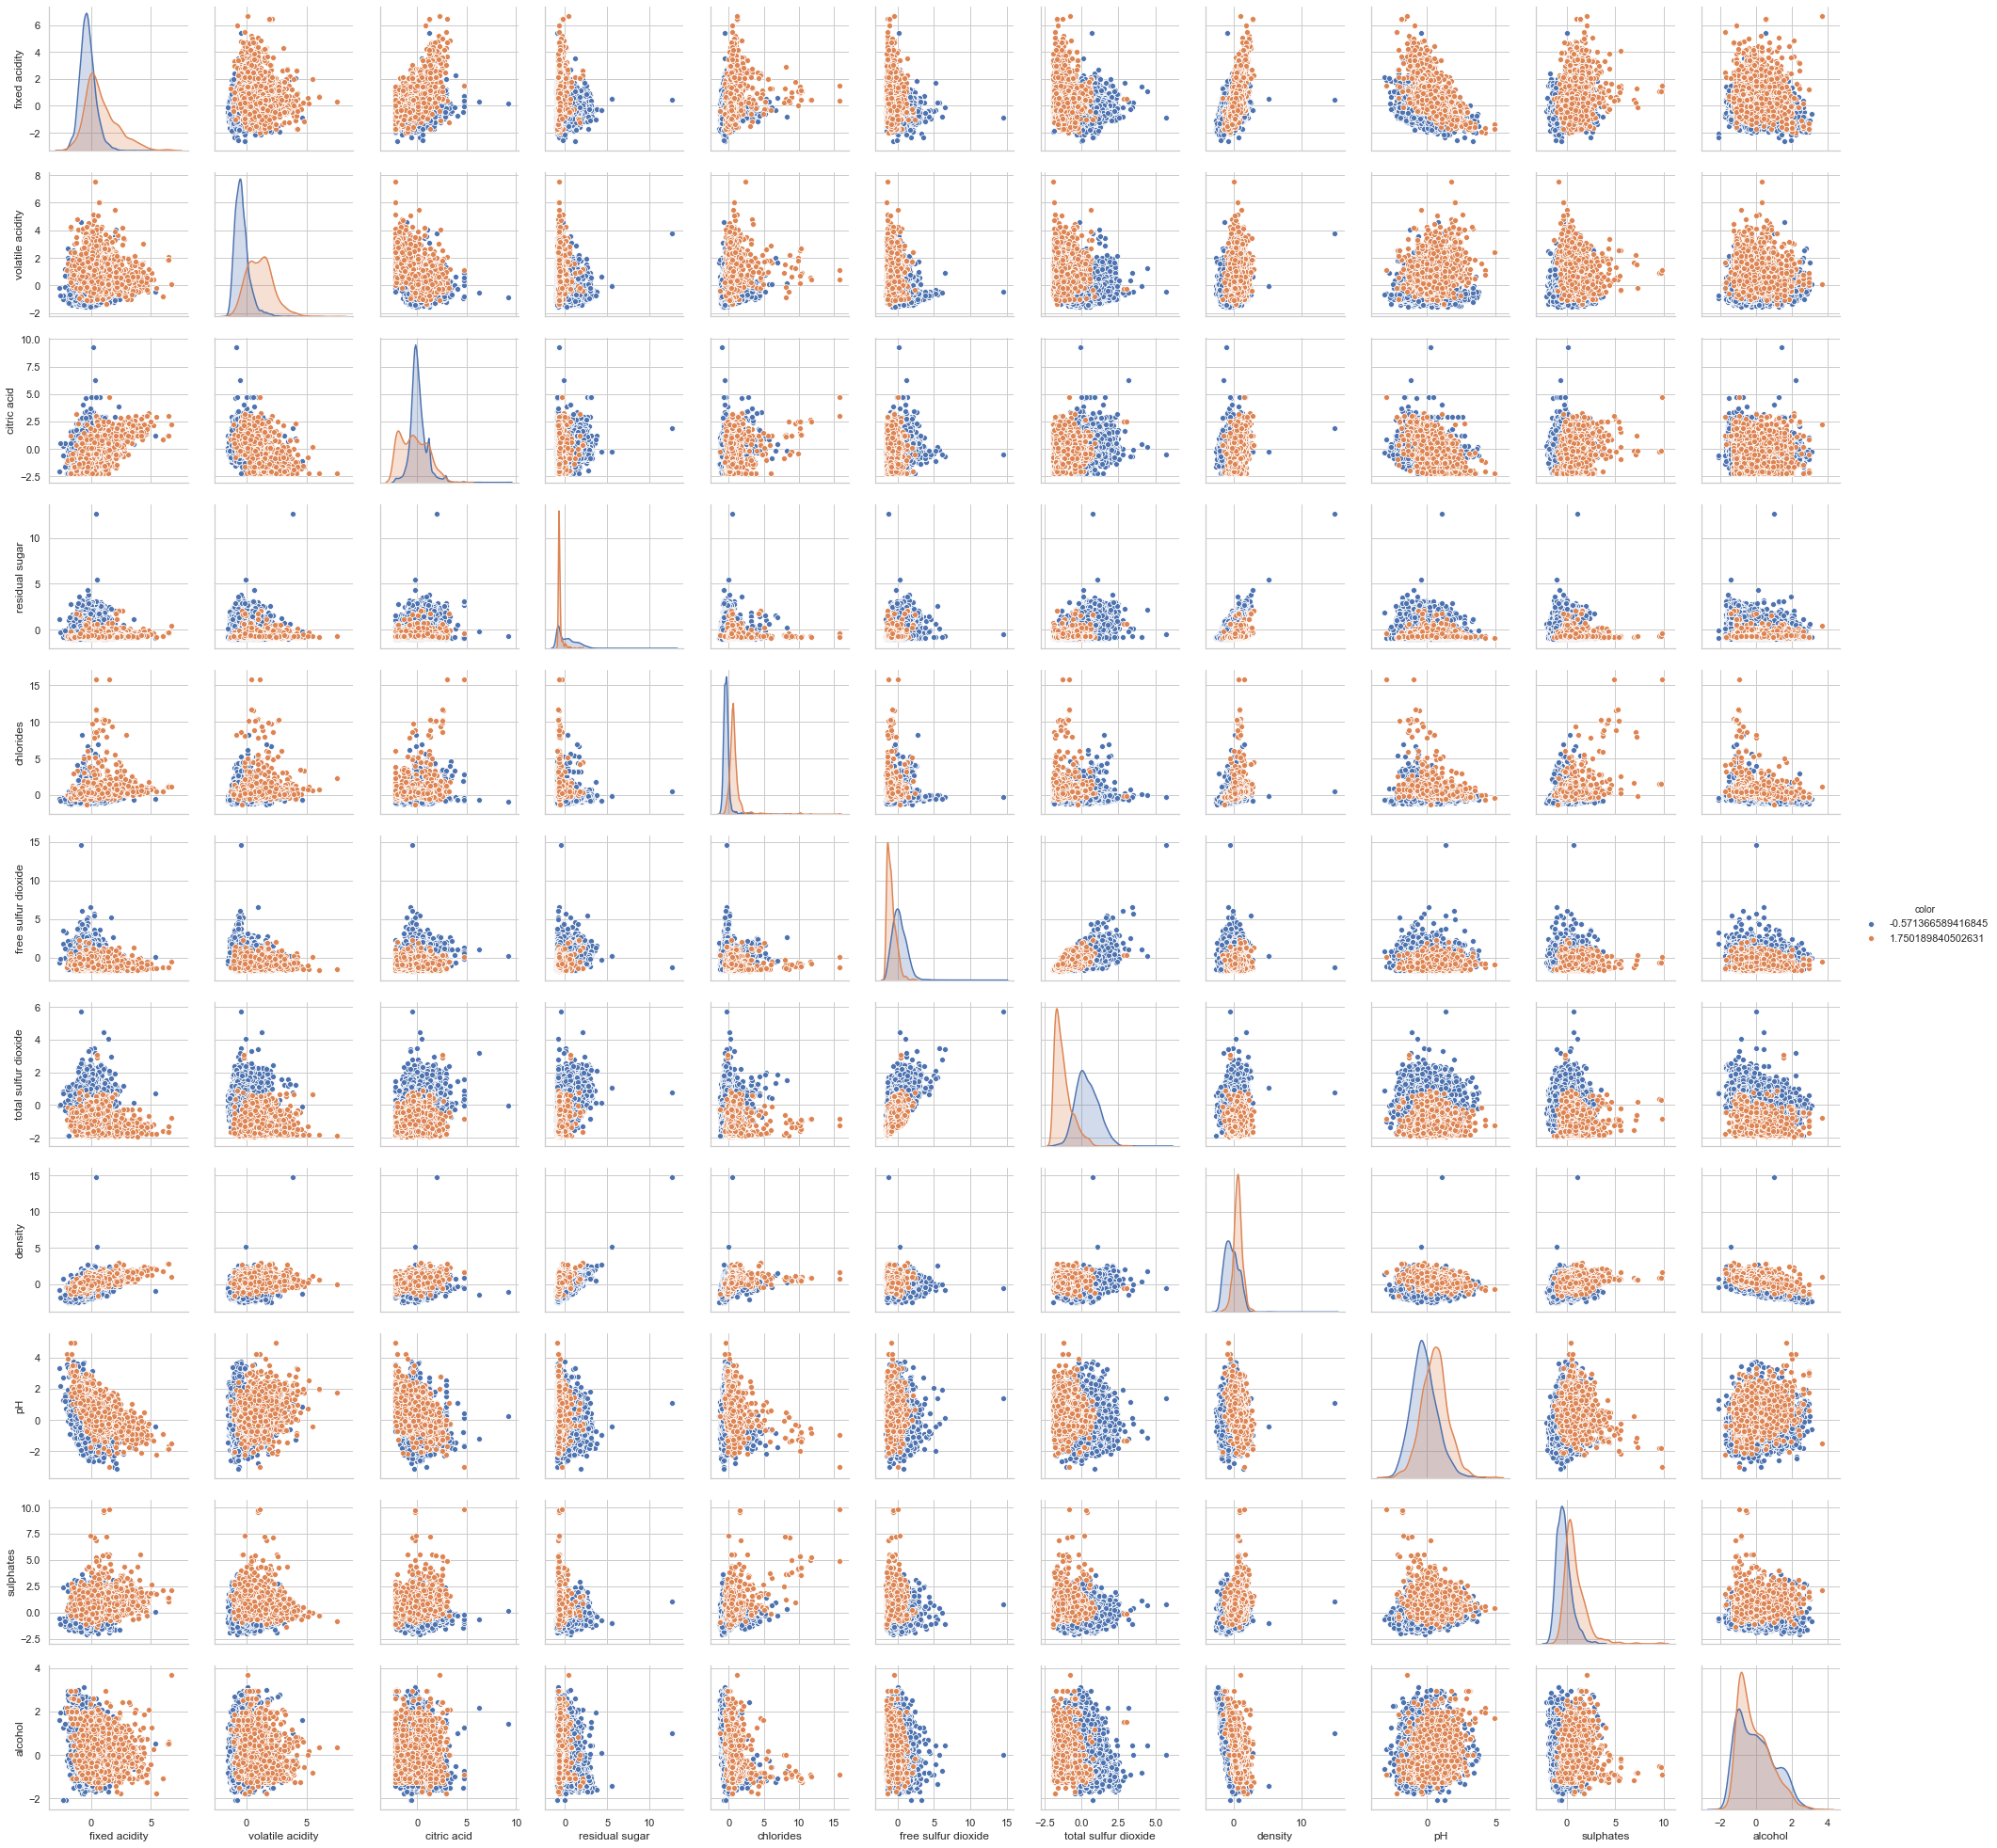

In [13]:
sns.pairplot(newdf_C ,hue='color',diag_kind = 'kde',vars=var)

> For the above two pair plots, represents the Color of the Wine Dataset. In this scenario as well, the normalized and unormalized data sets are illustrats that the scale of the normalised dataset is more balanced and has numerical stability where as the unnormalized dataset has the scaling range which is not stable which leads to diffculty in analysing the data points. Lets consider an example of a pair plot PH[Y-axis]  vs  Free Sulfur Dioxide[X-axis] .For the unnormized data the scale of the plot ranges from [2.75,4.00] in y-axis and [0,300] in x-axis, However the normalised data is scaled which ranges from [-2,4] in the y-axis and [0,15] in the x-axis.

## Classification

## 1. KNN All Features Without Normilization for color label

In [14]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier #importing the KNN Classifer
#from sklearn.datasets import load_iris #loading the iris data set  from sklearn
from sklearn import metrics

In [15]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [16]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[C]

In [17]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarrayknnwn = np.zeros((len(n_neighborslist),len(col)))
acc_weightknnwn=pd.DataFrame(accarrayknnwn, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(X_train, y_train)
        y_predknnwn = neigh.predict(X_test)
        accscoreknnwn = accuracy_score(y_test, y_predknnwn)
        acc_weightknnwn.at[k,col[i]]= accscoreknnwn
  
acc_weightknnwn.describe()
acc_weightknnwn.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.950000            0.961538            0.950000
2  0.939231            0.961538            0.950000
3  0.935385            0.960000            0.949231
4  0.935385            0.960769            0.951538

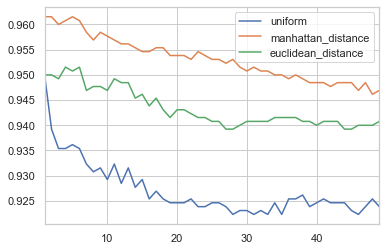

In [19]:
acc_weightknnwn[1:].plot.line()

##  2. KNN All features for Quality label without Normilization

In [20]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [21]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [22]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarraylknnwn = np.zeros((len(n_neighborslist),len(col)))
acc_weightlknnwn=pd.DataFrame(accarraylknnwn, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(X_train, y_train)
        y_predlknnwn = neigh.predict(X_test)
        accscorelknnwn = accuracy_score(y_test, y_predlknnwn)
        acc_weightlknnwn.at[k,col[i]]= accscorelknnwn
  
acc_weightlknnwn.describe()
acc_weightlknnwn.head() 
    

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.581538            0.581538            0.581538
2  0.510769            0.581538            0.581538
3  0.493846            0.585385            0.579231
4  0.480000            0.588462            0.580769

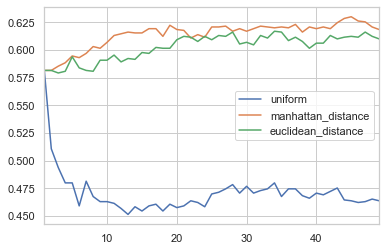

In [24]:
acc_weightlknnwn[1:].plot.line()

### 3. KNN for all features with nomalization for color label

In [25]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [26]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[C]

In [27]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [29]:

norma = preprocessing.StandardScaler().fit(X_train)
xtrainnorm_S = norma.transform(X_train) 
xtestnorm_S = norma.transform(X_test)

In [30]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),len(col)))
acc_weight=pd.DataFrame(accarray, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(xtrainnorm_S, y_train)
        y_pred = neigh.predict(xtestnorm_S)
        accscore = accuracy_score(y_test, y_pred)
        acc_weight.at[k,col[i]]= accscore
  
acc_weight.describe()
acc_weight.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.993846            0.995385            0.993846
2  0.993846            0.995385            0.993846
3  0.995385            0.995385            0.996154
4  0.994615            0.996154            0.995385

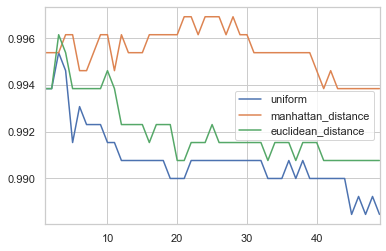

In [31]:
acc_weight[1:].plot.line()

## 4. KNN for all features with normalization for quality label

In [32]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [33]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [34]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_trainkl, X_testkl, y_trainkl, y_testkl = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [36]:
norma = preprocessing.StandardScaler().fit(X_trainkl)
xtrainnorm_Sl = norma.transform(X_trainkl) 
xtestnorm_Sl = norma.transform(X_testkl)

In [37]:
n_neighborslist = list(range(1,50))
col_names_pkl=[['uniform',2],['distance',1],['distance',2]]
colkl=['uniform','manhattan_distance','euclidean_distance']
accarraykl = np.zeros((len(n_neighborslist),len(col)))
acc_weightkl=pd.DataFrame(accarraykl, columns=colkl)
for i in range(len(col_names_pkl)):
    for k in n_neighborslist:
        neighkl = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neighkl.fit(xtrainnorm_Sl, y_trainkl)
        y_predkl = neighkl.predict(xtestnorm_Sl)
        accscorekl = accuracy_score(y_testkl, y_predkl)
        acc_weightkl.at[k,colkl[i]]= accscorekl
  
acc_weightkl.describe()
acc_weightkl.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.628462            0.642308            0.628462
2  0.580000            0.642308            0.628462
3  0.564615            0.657692            0.659231
4  0.572308            0.652308            0.657692

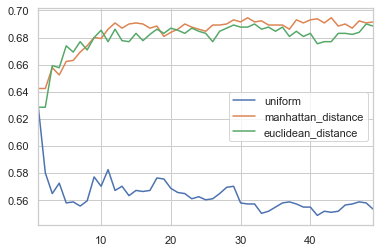

In [38]:
acc_weightkl[1:].plot.line()

## PCA and LDA without Normalization for quality

##  5.PCA for 5 features without normilization for quality label

In [39]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [40]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [41]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,random_state=42)
tranf_lwn=pca.fit_transform(X_train)
tranf_test_lwn=pca.fit_transform(X_test)

In [43]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarraypcawn = np.zeros((len(n_neighborslist),len(col)))
acc_weightlpcawn=pd.DataFrame(accarraypcawn, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(tranf_lwn, y_train)
        y_predlpcawn = neigh.predict(tranf_test_lwn)
        accscorelpcawn = accuracy_score(y_test, y_predlpcawn)
        acc_weightlpcawn.at[k,col[i]]= accscorelpcawn
  
acc_weightlpcawn.describe()
acc_weightlpcawn.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.571538            0.573846            0.571538
2  0.514615            0.573846            0.571538
3  0.494615            0.586923            0.580769
4  0.482308            0.576154            0.578462

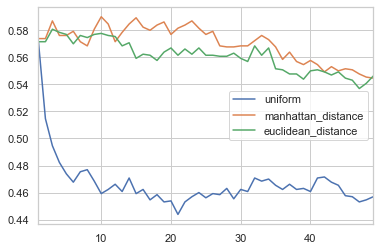

In [44]:
acc_weightlpcawn[1:].plot.line()

## 6. LDA for 5 features without normilization for quality label

In [45]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [46]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [47]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
lda = LDA(n_components=5)
X_lda_wn = lda.fit_transform(X_train,y_train)
X_test_wn = lda.fit_transform(X_test,y_test)

In [49]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarraylwn = np.zeros((len(n_neighborslist),len(col)))
acc_weightlwn=pd.DataFrame(accarraylwn, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(X_lda_wn, y_train)
        y_predlwn = neigh.predict(X_test_wn)
        accscorelwn = accuracy_score(y_test, y_predlwn)
        acc_weightlwn.at[k,col[i]]= accscorelwn
  
acc_weightlwn.describe()
acc_weightlwn.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.439231            0.430769            0.439231
2  0.446154            0.430769            0.439231
3  0.436154            0.443077            0.446154
4  0.475385            0.461538            0.458462

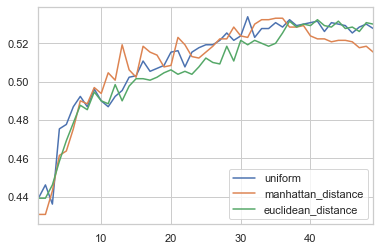

In [50]:
acc_weightlwn[1:].plot.line()

## PCA and LDA with Normalization for quality

### 7. PCA for 5 features with normalization for quality label

In [51]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA #importing the KNN Classifer
#from sklearn.datasets import load_iris #loading the iris data set  from sklearn
from sklearn import metrics

In [52]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [53]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]
    

In [54]:
X_stdl = StandardScaler().fit_transform(X)

In [55]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train_stdl, X_test_stdl, y_train_l, y_test_l = train_test_split(
    X_stdl, y, test_size=0.2, random_state=42)

In [56]:

pca = PCA(n_components=5,random_state=42)
tranf_pcal=pca.fit_transform(X_train_stdl)
tranf_pca_testl=pca.fit_transform(X_test_stdl)
#tranf_pcay=pca.fit_transform(y_train)
#tranf_pcaytest=pca.fit_transform(y_test)

In [57]:
n_neighborslist = list(range(1,51))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarraypcal = np.zeros((len(n_neighborslist),len(col)))
acc_weightpcal=pd.DataFrame(accarraypcal, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(tranf_pcal, y_train_l)
        y_predpcal = neigh.predict(tranf_pca_testl)
        accscorepcal = accuracy_score(y_test_l, y_predpcal)
        acc_weightpcal.at[k,col[i]]= accscorepcal
  
acc_weightpcal.describe()
acc_weightpcal.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.380000            0.371538            0.380000
2  0.376923            0.371538            0.380000
3  0.390000            0.400769            0.405385
4  0.395385            0.400000            0.413846

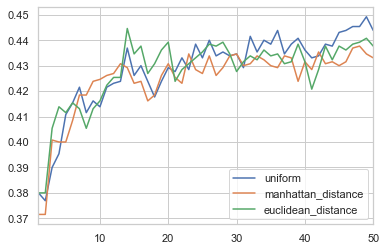

In [58]:
acc_weightpcal[1:].plot.line()

## 8. LDA for 5 features with normalization for quality label

In [59]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn

In [60]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [61]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [62]:
X_stdlda = StandardScaler().fit_transform(X)

In [63]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train_stdlda, X_test_stdlda, y_train_lq, y_test_lq = train_test_split(
    X_stdlda, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
lda = LDA(n_components=5)
X_lda = lda.fit_transform(X_train_stdlda,y_train_lq)
X_lda_test = lda.fit_transform(X_test_stdlda,y_test_lq)

In [65]:
n_neighborslist = list(range(1,50))
col_names_p=[['uniform',2],['distance',1],['distance',2]]
col=['uniform','manhattan_distance','euclidean_distance']
accarraylda = np.zeros((len(n_neighborslist),len(col)))
acc_weightlda=pd.DataFrame(accarraylda, columns=col)
for i in range(len(col_names_p)):
    for k in n_neighborslist:
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names_p[i][0],p=col_names_p[i][1])
        neigh.fit(X_lda, y_train_lq)
        y_predlda = neigh.predict(X_lda_test)
        accscorelda = accuracy_score(y_test_lq, y_predlda)
        acc_weightlda.at[k,col[i]]= accscorelda
  
acc_weightlda.describe()
acc_weightlda.head() 

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.439231            0.430769            0.439231
2  0.446154            0.430769            0.439231
3  0.436154            0.443077            0.446154
4  0.475385            0.461538            0.458462

In [66]:
acc_weightlda.shape

(50, 3)

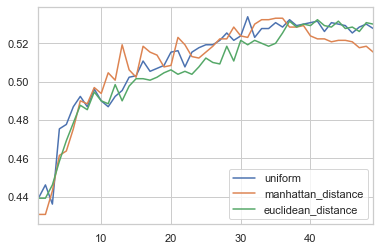

In [67]:
acc_weightlda[1:].plot.line()

## Comparison of PCA and LDA Performance Differences using Knn weight schemes

> The Accuracy of classification PCA and LDA models of Normalised-Quality Wine Dataset. The above plots represent the accuracy of classifying wine dataset for implementing PCA and LDA Algorithms. We have implemented the weight schemes of KNN like Uniform, Manhattan, Euclidean Distance metrics for PCA and LDA models to compare the performance differences for the two models. 

>In the case of the Wine- Quality dataset for the comparision. So they are 12 dimensions which implies that one is label i.e Quality and other are 11 Dimensions . We are reducing the dimensions from 11 Dimensions to 5 Features in case of PCA by importing the PCA library from sklearn and setting the n_components= 5 and 5 Dimensions in case of LDA, as we import the LDA library from sklearn the n_Components= n_classes-1,The quality dataset has 7 classes, we can select the value <6 hence we selected 5 dimensions to get the accuracy. 

<ol>
    
Analysis of the Graphs:

    1. Uniform Distance Metric for PCA and LDA:
    
  <li>In PCA Plot, The Uniform Distance metric is represented in Blue Line has a steep increase in the accuracy values from k=0 to 20 the accuracy is  38.00% to 43%, we can observe a drastic improvement of accuracy at k=14 to around 43.8%. However, at k=18 there is a drop in accuracy to 41.8%. Later, the accuracy continues to increase with slight variations of ups and downs from k= 20 to 50, where maximum accuracy is recorded at 45% at k=48 which implies that as the k values are increasing, the PCA models ensures to classify the data with minimum features of the datset.
  <li> In LDA Plot, The Uniform Distance metric is represented in Blue line always experiences a slight increase as the k values are increasing. It grows slowly from k=0 to 20 in accuracy range 44% to 51.8%. Further increase slightly, at k=31 the accuracy is recorded the highest as 53.5%. However,We can observe that the model is maintain the accuracy to be more than 52% from k values more than 32 to 50.
      
    2. Manhattan Distance Metric for PCA and LDA:
    
    Manhattan distance function computes the distance that would be traveled to get from one data point to the other if a grid-like path is followed. The Manhattan distance between two items is the sum of the differences of their corresponding components.
   <li> In PCA plot, the Manhattan distance is represented in Orange line experience an increase in the accuracy in range of k=0 to 20, which has maximum accuracy at k=12 as 43%, also has decrease in accuracy at k=18 as 41.6%. From the range of k=20 to 50 the maximum accuracy is 43.4% at k=22 and then later is experiences a constant increase and decrease in accuracy.
   <li> In LDA Plot, The Manhattan distance is also represented in Orange line experience at drastic increase in accuracy in k=0 to 20 values. At k=12 the maximum accuracy is 52%. As k values increases the LDA model is classifying the data with less number of features at k=34 the highest accuracy is around 53.8%. Later, the accuracy is slightly decreases.
       Here we can observe that both in PCA and LDA k=12 the accuracy is suddenly increased later continues to increase its classification rate. 
       
     3. Euclidean Distance Metric for PCA and LDA:
     
     Euclidean distance measures the direct distance between the datapoints computing the square root of the sum of the squares of the differences between corresponding values. 
   <li> In PCA plot, the Euclidean distance is represented in Green line increases drastically from k=0 to 20, experiencing maximum accuracy at k=12, 44.4% then gradually decreasing from k=20 to 50. Here we can observe that as the k values are increase the accuracy levels are droping in PCA.
    <li> In LDA plot, The graph increases as the k values are increasing from all the ranges of k values 0 to 50. The maximum accuracy is observed to be 53.2% at k=38. Further, it is observed to be decreasing.
        
        
> Overall, the Uniform Distance metric's performance is recorded to be the highest in both the models, however at different k values. In PCA it is 45% and LDA it is 53%. Other observation is that in at k=12 in both PCA and LDA there is steep increase in accuracy. Furthermore as the K values increase they are observed to be constant. 

> To conclude, the LDA with Uniform Distance is more than PCA Uniform distance because the dimensionality reduction is for number of classes, i.e. in this case from 7 classes of quality to 5 classes. Therefore the classification improvement is observed , where as for PCA, the dimensionality reduction is for features i.e from 11 to 5 features which makes the accuracy for classification decrease as there is loss in data. Also, LDA performs better for large dataset having multiple classes as the  class separability is an important factor while reducing dimensionality.

# Analysis and Dicussion

### K Plots

> The required graphs are in the above sections. Please kindly go through the same.

### Features:

As per the pair plots obtained for Wine-Color Dataset the relationship between features are corelated with each other, which gives the seperation of classes.

## PCA vs. LDA:

<ol>
    
<li> For this task LDA worked better than PCA, as we could get more accuracy consisdering less number of classes and also since the dataset has large data points, as LDA can handle the multi class data seperabilty much better than PCA the performance is enhanced. </li>

<li> a. For PCA, The acurracy of without normalization is more than normalization of data. The classification accuracy of with out Normalisation of data for Uniform distance is much less than eucliean and manhattan distance metrics. However, after normalization of data although there is a decreased in the accuracy of classification of data. From the graphs, it is observed that all the three KNN weight schemes are almost in the same scale.
    b. For LDA, The classification of data accuracy is neither increased nor decreased there is no impact of Normalization. Even, in the graphs are same before and after the normalization. 
</li>
    

</ol>    

## PCA Projection to 2 components for Color Label

In [68]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA #importing the KNN Classifer
#from sklearn.datasets import load_iris #loading the iris data set  from sklearn
from sklearn import metrics

In [69]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [70]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[C]

In [71]:
X_stdc = StandardScaler().fit_transform(X)

In [72]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train_stdc, X_test_std, y_train_pca, y_test_pca = train_test_split(
    X_stdc, y, test_size=0.2, random_state=42)

In [73]:
pca = PCA(n_components=2,random_state=42)
color2_transf = pca.fit_transform(X_train_stdc)

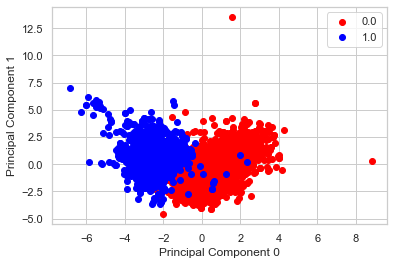

In [74]:
from matplotlib.pyplot import subplot
a= ('Red', 'White')
b=('red','blue')
target = np.unique(wine[C])
markers='o','o'
for lab,col,m in zip(target,b,markers):
    #subplot(1,1,1)
    plt.scatter(color2_transf[y_train_pca==lab, 0],
                    color2_transf[y_train_pca==lab, 1], 
                    c=col,
                    label=lab,
                   marker=m)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

> From above obtained projection plot on Principle Component 0 and Principle Component 1 we have two distinguish classes well defined on two principle components. When we compare the above plot with the pair plot of Color- Wine dataset after normalization, we can find a similar plot for PH Vs Total Sulfur Dioxide plot. In the Plot we can clear seperate the Red and White wine dataset.  

##  PCA for 2 components for quality label

In [75]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA #importing the KNN Classifer
#from sklearn.datasets import load_iris #loading the iris data set  from sklearn
from sklearn import metrics

In [76]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("Downloads\winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("Downloads\winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [77]:
#initializing the X and y variables for spliting the data

X=wine[D]
y=wine[L]

In [78]:
X_stdl = StandardScaler().fit_transform(X)

In [79]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train_stdl, X_test_std, y_train_l, y_test_l = train_test_split(
    X_stdl, y, test_size=0.2, random_state=42)

In [80]:
pca = PCA(n_components=2,random_state=42)
qualitypca_transf = pca.fit_transform(X_train_stdl)

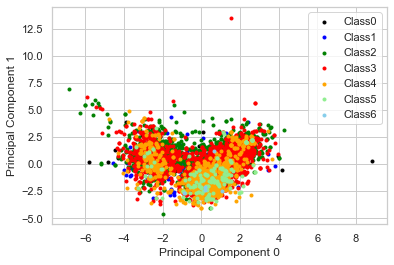

In [81]:
from matplotlib.pyplot import subplot
a= ('Class0', 'Class1', 'Class2','Class3','Class4','Class5','Class6')
b=('black','blue','green','red','orange','lightgreen','skyblue')
target = np.unique(wine[L])
markers='.','.','.','.','.','.','.'
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for lab,col,m,a in zip(target,b,markers,a):
    plt.scatter(qualitypca_transf[y_train_l==lab, 0],
                    qualitypca_transf[y_train_l==lab, 1], 
                    c=col,
                    label=a,
                   marker=m)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

> In the above plot, the 7 classes are projected on the first two principle components in scatter plot, we can observe that all the classes are overlaped and it is diffcult to classfy the classes based on the plot. Hence, when we cannot compare the same plot with any of the pair plot for Quality- Wine dataset because of the overlapping of the classes 

## LDA projection on quality label

In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn

In [83]:
# Using ttain_test_split() method, spliting the data into train_validation set and 
#test set in this case- 80%-20% with random_state=42
X_train_stdlda, X_test_stdlda, y_train_lq, y_test_lq = train_test_split(
    X_stdl, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
lda = LDA(n_components=2)
X_lda_quality = lda.fit_transform(X_train_stdlda, y_train_lq)

In [85]:
X_lda_quality.shape

(5197, 2)

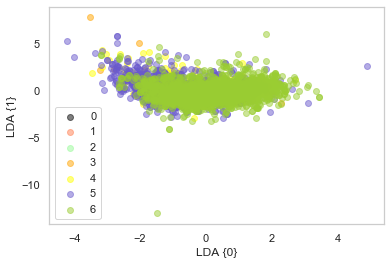

In [86]:

for label,marker,color in zip(
        range(0,7),('o', 'o', 'o','o','o','o','o'),('black', 'coral', 'palegreen','orange','yellow','slateblue','yellowgreen')):
    plt.scatter(x=X_lda_quality[:,0].real[y_train_lq == label],
                y=X_lda_quality[:,1].real[y_train_lq == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label
                )
    plt.xlabel('LDA {0}')
    plt.ylabel('LDA {1}')
   
    

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
    #plt.title('LDA: Iris projection onto the first 2 linear discriminants')
plt.grid()
plt.legend()
plt.tight_layout
plt.show()

> The above plot represent the Wine Quality data points projected on the 1st two LDA Components. The 7 classes of Quality label are overlaped on the components. We can only identify 4 classes on the scatter plot, even those classes are not clearly seperated. Therefore we cant find the comparision of scatter plot with the pair plots obtained from Normalised Wine-Quality Dataset.  

<ol>
 
 
 References:
 
 Pair Plot:
 <li>https://seaborn.pydata.org/generated/seaborn.pairplot.html</li>
 
 Normalization:
<li>https://sebastianraschka.com/Articles/2014_about_feature_scaling.html</li>
<li>https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166</li>
<li>https://www.kaggle.com/sgus1318/wine-quality-exploration-and-analysis</li>
<li>https://code-maven.com/predicting-wine-cultivar</li>

    
 KNN:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</li>
<li>https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/</li>
<li>https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/</li>
<li>https://stats.stackexchange.com/questions/363889/which-type-of-data-normalizing-should-be-used-with-knn</li>
<li>https://kenzotakahashi.github.io/k-nearest-neighbor-from-scratch-in-python.html</li>
<li>https://www.dataquest.io/blog/k-nearest-neighbors-in-python/</li>
<li>https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d</li>
<li>https://www.edureka.co/blog/k-nearest-neighbors-algorithm/</li>
<li>https://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html/2</li>

PCA:
<li>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html</li>
<li>http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/02_EDA_PCA/02_EDA_PCA.html<li>
All models
<li>https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib</li>

LDA:
<li>https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html</li>

 </ol>   
    